## Import Statements

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [3]:
df = pd.read_csv('QueryResults.csv', header=0, names=["DATE", "TAG","POSTS"])
# setting the header row to 0 allows us to substitute our own column names

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [4]:
print(df.head())
df.tail()

                  DATE       TAG  POSTS
0  2008-07-01 00:00:00        c#      3
1  2008-08-01 00:00:00  assembly      8
2  2008-08-01 00:00:00         c     83
3  2008-08-01 00:00:00        c#    504
4  2008-08-01 00:00:00       c++    164


,DATE,TAG,POSTS
2575,2024-01-01 00:00:00,php,1729
2576,2024-01-01 00:00:00,python,8926
2577,2024-01-01 00:00:00,r,1916
2578,2024-01-01 00:00:00,ruby,170
2579,2024-01-01 00:00:00,swift,990


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [5]:
df.shape

(2580, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [6]:
df.count()

DATE     2580
TAG      2580
POSTS    2580
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [10]:
df.groupby("TAG").sum()

,POSTS
TAG,
assembly,43965
c,402584
c#,1610908
c++,804282
delphi,51662
go,72236
java,1913552
javascript,2522796
perl,68035


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [11]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,186,186
c,186,186
c#,187,187
c++,186,186
delphi,186,186
go,171,171
java,186,186
javascript,186,186
perl,186,186


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [13]:
# use the double square bracket notation or dot notation to look at the second entry in the column
df['DATE'][1]
# df.DATE[1]

'2008-08-01 00:00:00'

In [14]:
# inspecting the data type
type(df['DATE'][1])

str

In [16]:
# convert the string to a timestamp using the to_datetime() method
print(pd.to_datetime(df['DATE'][1]))
type(pd.to_datetime(df['DATE'][1]))

2008-08-01 00:00:00


pandas._libs.tslibs.timestamps.Timestamp

In [17]:
# convert the entire df['DATE'] column
df['DATE'] = pd.to_datetime(df['DATE'])
# or df.DATE = pd.to_datetime(df.DATE)
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,504
4,2008-08-01,c++,164


## Data Manipulation



In [20]:
# test 
test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old', 'Old'],
                        'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu', 'Sylvester'],
                        'Power': [100, 80, 25, 50, 99, 75, 5, 30]})
print(test_df)
pivoted_df = test_df.pivot(index="Age", columns="Actor", values="Power")
pivoted_df

     Age      Actor  Power
0  Young       Jack    100
1  Young     Arnold     80
2  Young      Keanu     25
3  Young  Sylvester     50
4    Old       Jack     99
5    Old     Arnold     75
6    Old      Keanu      5
7    Old  Sylvester     30


Actor,Arnold,Jack,Keanu,Sylvester
Age,,,,
Old,75,99,5,30
Young,80,100,25,50


In [24]:
# create pivot table 
# where each programming language becomes a column and date column becomes the new index(i.e the label for rows)
reshaped_df = df.pivot(index='DATE', columns="TAG", values="POSTS")
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,504.0,164.0,14.0,NaN,222.0,163.0,28.0,157.0,119.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1639.0,755.0,104.0,NaN,1129.0,634.0,130.0,475.0,537.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1987.0,807.0,112.0,NaN,1149.0,722.0,128.0,608.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1730.0,734.0,140.0,NaN,954.0,580.0,97.0,499.0,448.0,1.0,157.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-01,157.0,872.0,3052.0,1491.0,105.0,424.0,3330.0,5700.0,61.0,1665.0,8623.0,2038.0,191.0,861.0
2023-10-01,175.0,975.0,3199.0,1723.0,165.0,423.0,3445.0,5500.0,53.0,1547.0,9056.0,2067.0,196.0,905.0
2023-11-01,173.0,961.0,3120.0,1472.0,104.0,411.0,3301.0,5230.0,44.0,1406.0,8521.0,2000.0,157.0,873.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [25]:
reshaped_df.shape

(187, 14)

In [26]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [27]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,504.0,164.0,14.0,NaN,222.0,163.0,28.0,157.0,119.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1639.0,755.0,104.0,NaN,1129.0,634.0,130.0,475.0,537.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1987.0,807.0,112.0,NaN,1149.0,722.0,128.0,608.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1730.0,734.0,140.0,NaN,954.0,580.0,97.0,499.0,448.0,1.0,157.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [28]:
# count the number of entries per column 
reshaped_df.count()
# the count is different since the .count() method exclude NaN values

TAG
assembly      186
c             186
c#            187
c++           186
delphi        186
go            171
java          186
javascript    186
perl          186
php           186
python        186
r             184
ruby          186
swift         178
dtype: int64

In [29]:
reshaped_df.fillna(0, inplace=True)
# the inplace argument means that we are updating "reshaped_df"
# or reshaped_df = reshaped_df.fillna(0)

In [30]:
# check if there are any NaN values left in the entire DataFrame
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

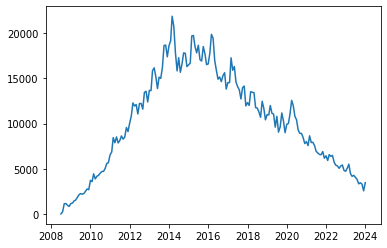

In [46]:
# show a line chart by supplying the values for horizontal axis(the x-vaules) and vertical axis(the y-values) for the chart
# here the x-values are date and y-values are number of posts
# plt.plot(reshaped_df.index, reshaped_df.java)

# or using the square bracket notation as:
plt.plot(reshaped_df.index, reshaped_df['java'])

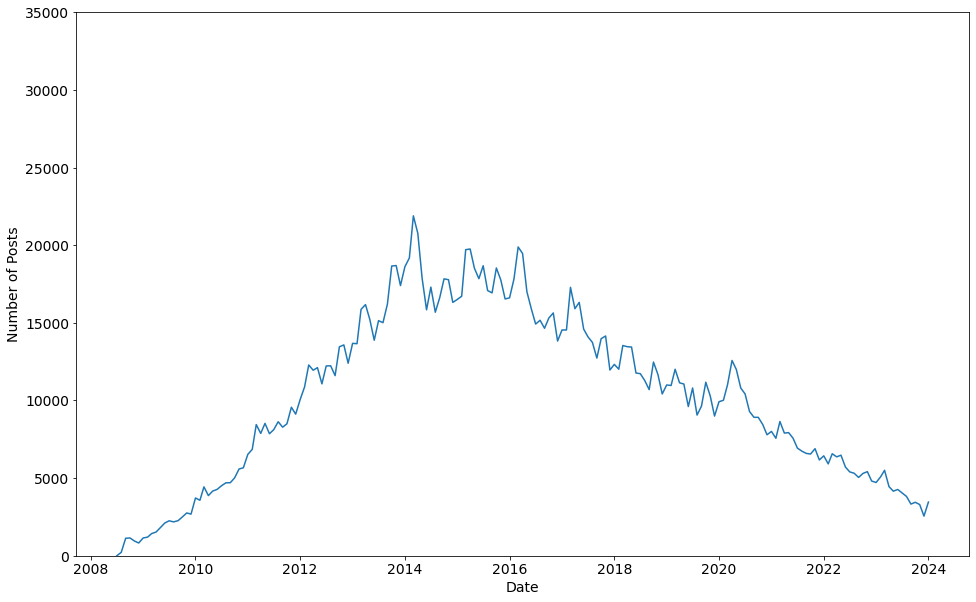

In [50]:
# make the chart larger by providing a width(16) and height(10) as the figsize of the figure
plt.figure(figsize=(16,10))

# increase the fontsize of the ticks on our axes 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# add labels to the chart
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)

# set a lower limit of 0 for the y-axis with .ylim() so we're never going to get less than 0 posts
plt.ylim(0, 35000)

# plot the graph
plt.plot(reshaped_df.index, reshaped_df.java)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

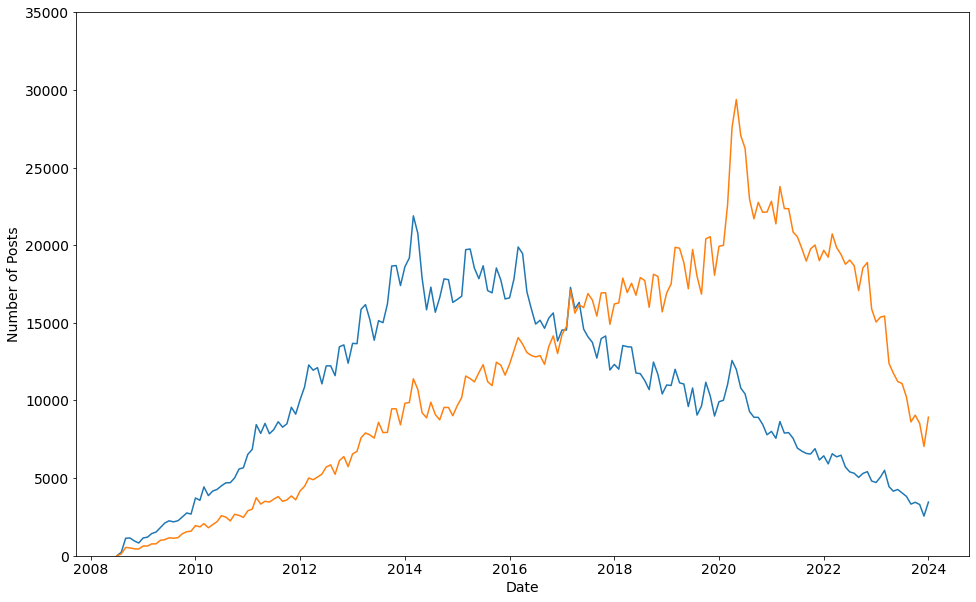

In [52]:
plt.figure(figsize=(16,10))

# increase the fontsize of the ticks on our axes 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# add labels to the chart
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)

# set a lower limit of 0 for the y-axis with .ylim() so we're never going to get less than 0 posts
plt.ylim(0, 35000)

# plot the graph
plt.plot(reshaped_df.index, reshaped_df.java)
plt.plot(reshaped_df.index, reshaped_df.python)

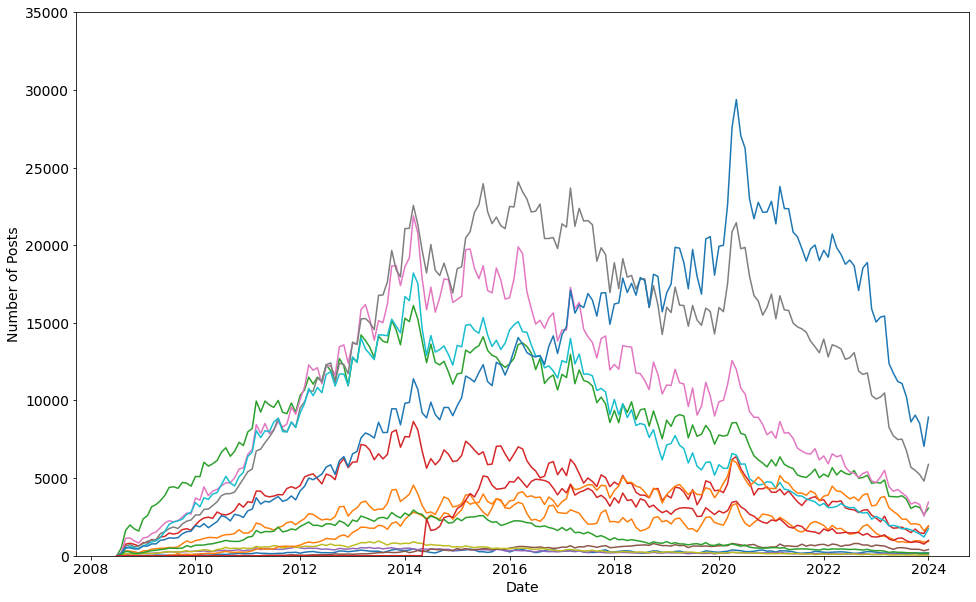

In [53]:
# use for-loop to plot all the programming languages on the same chart

plt.figure(figsize=(16,10))

# increase the fontsize of the ticks on our axes 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# add labels to the chart
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)

# set a lower limit of 0 for the y-axis with .ylim() so we're never going to get less than 0 posts
plt.ylim(0, 35000)

# plot all languages using for looop
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column])

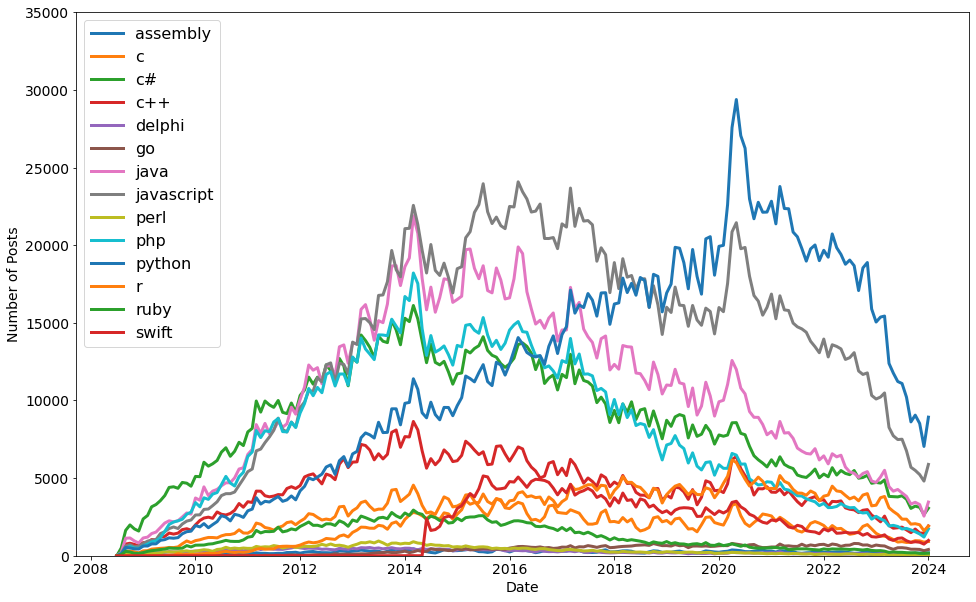

In [56]:
# add legend that tells us which color corresponds to each language

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# add a label for each line based on the column name and make the lines thicker using linewidth
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], linewidth=3, label=reshaped_df[column].name)
    
plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 